### **Probability project description:**

**Using the Glassdoor Gender pay gab analysis dataset, answer the following questions:**

1-We want to know whether men and women choose different jobs. (and if so which job)

2-We want to know whether men and women choose different departments. (and if so which department)

**rules:**
- only apply a test if it's conditions are met, if the conditions aren't met simply say "the test can't be performed"
- when possible calculate the probability of (type 1 error, type 2 error) and mention the probability of your conclusion being wrong.
- phrase your conclusions clearly don't just say reject or fail to reject
- Try to incorporate your conclusions with the appropriate graphs.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import contingency

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('Glassdoor Gender Pay Gap.csv')

In [4]:
data.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


## **Checking data is clean:**

- Get the shape of data
- Check Nulls
- Check data types
- General describtion for numerical data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
data.shape

(1000, 9)

In [7]:
data.isna().sum()

JobTitle     0
Gender       0
Age          0
PerfEval     0
Education    0
Dept         0
Seniority    0
BasePay      0
Bonus        0
dtype: int64

In [8]:
data.dtypes

JobTitle     object
Gender       object
Age           int64
PerfEval      int64
Education    object
Dept         object
Seniority     int64
BasePay       int64
Bonus         int64
dtype: object

In [9]:
data.describe()

,Age,PerfEval,Seniority,BasePay,Bonus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,3.037000,2.971000,94472.653000,6467.161000
std,14.294856,1.423959,1.395029,25337.493272,2004.377365
min,18.000000,1.000000,1.000000,34208.000000,1703.000000
25%,29.000000,2.000000,2.000000,76850.250000,4849.500000
50%,41.000000,3.000000,3.000000,93327.500000,6507.000000
75%,54.250000,4.000000,4.000000,111558.000000,8026.000000
max,65.000000,5.000000,5.000000,179726.000000,11293.000000


### 1-We want to know whether men and women choose different jobs. (and if so which job)


#### **General Exploration:**
- Gender
- JobTitle 

In [10]:
data['Gender'].value_counts().to_frame()

,count
Gender,
Male,532
Female,468


In [11]:
data['JobTitle'].value_counts().to_frame()

,count
JobTitle,
Marketing Associate,118
Software Engineer,109
Financial Analyst,107
Data Scientist,107
Graphic Designer,98
IT,96
Sales Associate,94
Driver,91
Warehouse Associate,90


In [12]:
job_for_gender = pd.crosstab(data['JobTitle'],data['Gender'])
job_for_gender

Gender,Female,Male
JobTitle,,
Data Scientist,53,54
Driver,46,45
Financial Analyst,49,58
Graphic Designer,48,50
IT,50,46
Manager,18,72
Marketing Associate,107,11
Sales Associate,43,51
Software Engineer,8,101


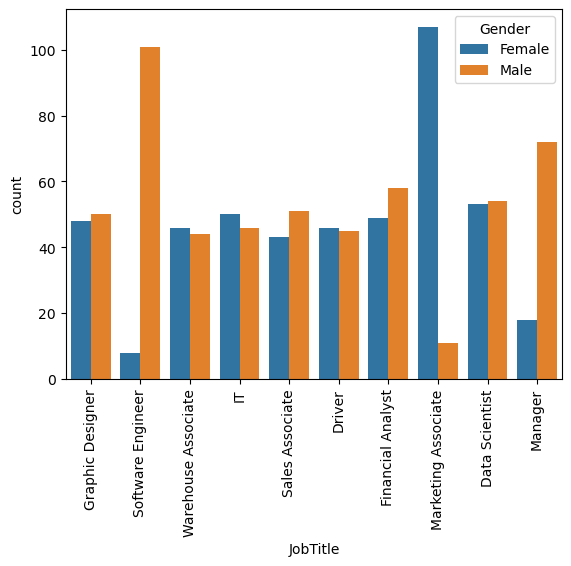

In [13]:
sns.countplot(data=data, x='JobTitle', hue='Gender')
plt.xticks(rotation=90)
plt.show()


### 1-We want to know whether men and women choose different jobs. (and if so which job)


- **From first look on the graph, it seems yes, men and women choose different jobs**
- **That appears in 3 Jobs {Software Engineer, Marketing Associate	, Manager}**
- **Men are dominant in {Software Engineer, Manager}, and Women are dominant in {Marketing Associate}**
- **Let's prove it and make it statistically**

## Joint distributin :


In [15]:
joint_dis_job = job_for_gender/job_for_gender.sum()
joint_dis_job

Gender,Female,Male
JobTitle,,
Data Scientist,0.113248,0.101504
Driver,0.098291,0.084586
Financial Analyst,0.104701,0.109023
Graphic Designer,0.102564,0.093985
IT,0.106838,0.086466
Manager,0.038462,0.135338
Marketing Associate,0.228632,0.020677
Sales Associate,0.091880,0.095865
Software Engineer,0.017094,0.189850


## Chi-Square Test

In [16]:
x2, p_value, dof, expected_freq = stats.chi2_contingency(job_for_gender)
print(f"X2: {x2}, P value: {p_value}, degree of freedom: {dof}")

X2: 188.23545384004152, P value: 9.631049089256313e-36, degree of freedom: 9


### **Since P value is too small, we are in the critical region , so we reject the null hypothesis that till each jobs for men and women have the same disribution, so they are different**

### **Now we want to know where is this difference, in other words, what are the jobs that cause rejection of the null Hypo**

### **Difference between two proportions test**

In [17]:
def sample_prop_test(p1, p2, n1, n2, sl):
    
    null_mu = 0
    
    se = np.sqrt((p1*(1-p1)/n1) + (p2*(1-p2)/n2))
    
    p_value = stats.norm.sf(abs(p1 - p2), loc=null_mu, scale=se)
    
    alt_mu = p1 - p2
    if alt_mu > 0:
        critical_val = stats.norm.isf(sl, loc=null_mu, scale=se)
    else:
        critical_val = stats.norm.ppf(sl, loc=null_mu, scale=se)
    
    if critical_val > alt_mu:
        beta = stats.norm.sf(critical_val, loc=alt_mu, scale=se)
    else:
        beta = stats.norm.cdf(critical_val, loc=alt_mu, scale=se)
        
    cf = np.array([[1-sl,sl],[beta,1-beta]])
    sns.heatmap(cf,annot=True,xticklabels=['fail to reject', 'reject'], yticklabels=['Ho true', 'Ho false'], cmap='coolwarm')
    plt.show()
    return p_value, beta


 ************* Data Scientist ***************** 


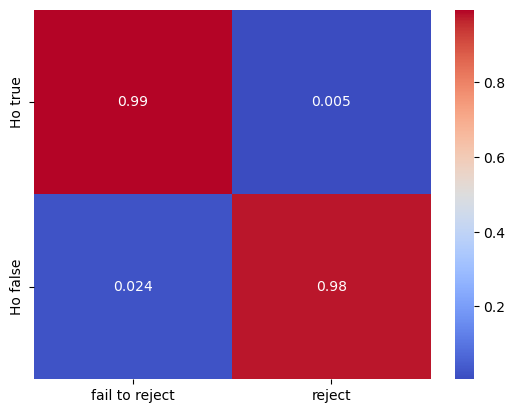

P Value is 0.2750025417789063, type 2 error rate is 0.02396002195802663
Fail to reject Null Hypo

 ************* Driver ***************** 


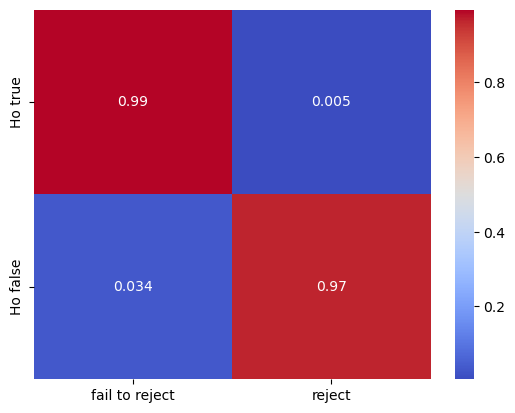

P Value is 0.22698353078097372, type 2 error rate is 0.033849015921924665
Fail to reject Null Hypo

 ************* Financial Analyst ***************** 


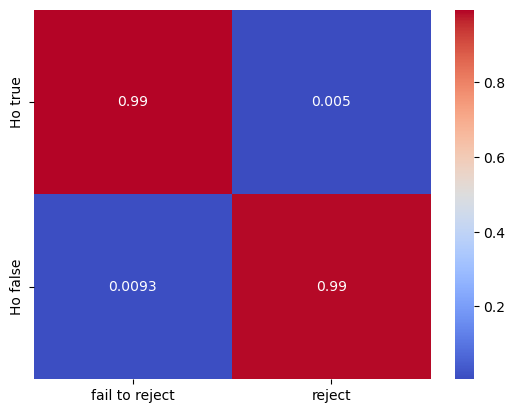

P Value is 0.4125998846962613, type 2 error rate is 0.009262171528220727
Fail to reject Null Hypo

 ************* Graphic Designer ***************** 


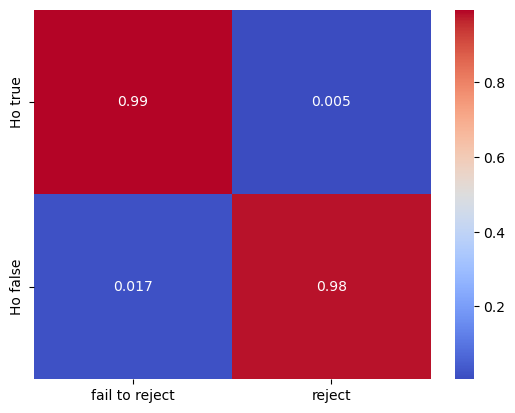

P Value is 0.3248338337633677, type 2 error rate is 0.01693544500684366
Fail to reject Null Hypo

 ************* IT ***************** 


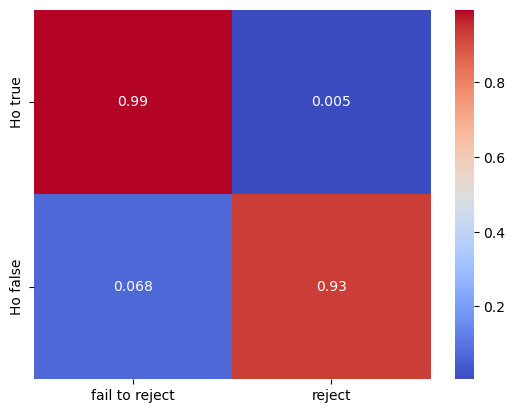

P Value is 0.13891064896652072, type 2 error rate is 0.06803291936013688
Fail to reject Null Hypo

 ************* Manager ***************** 


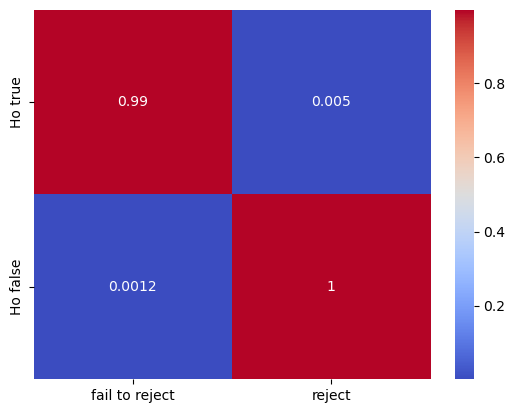

P Value is 1.0555301451638395e-08, type 2 error rate is 0.001235725407362549
Reject Null Hypo

 ************* Marketing Associate ***************** 


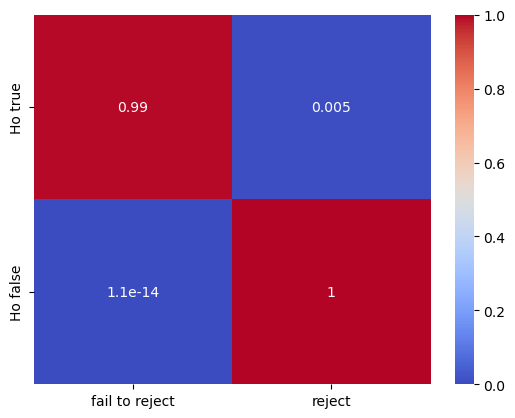

P Value is 8.99986789317581e-25, type 2 error rate is 1.1418072456627337e-14
Reject Null Hypo

 ************* Sales Associate ***************** 


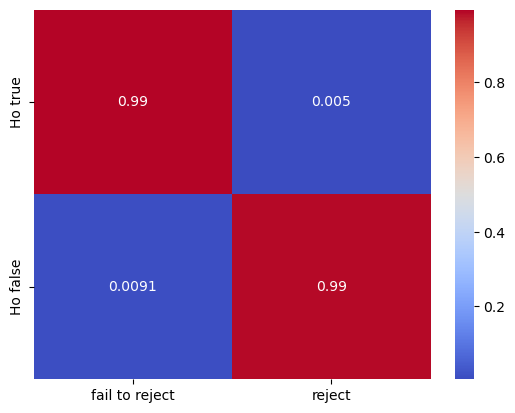

P Value is 0.4146120366344068, type 2 error rate is 0.009134205020002444
Fail to reject Null Hypo

 ************* Software Engineer ***************** 
Can't perform test

 ************* Warehouse Associate ***************** 


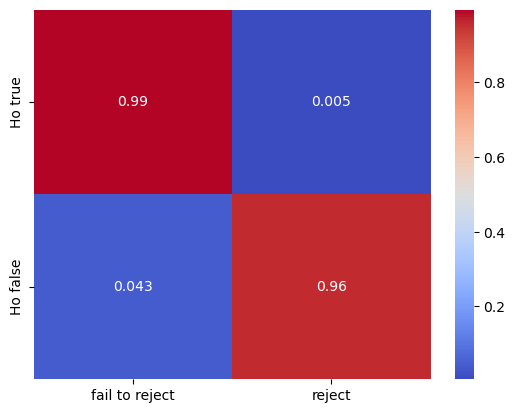

P Value is 0.19619454841333084, type 2 error rate is 0.04266747810646026
Fail to reject Null Hypo


In [18]:

sl = 0.05/len(joint_dis_job)
for job in joint_dis_job.index:
    print(f"\n ************* {job} ***************** ")
    p1, p2 = joint_dis_job.loc[job]
    n1, n2 = job_for_gender.sum()
    if (n1*p1 >= 10) and (n2*p2 >= 10): 
        p_value, beta = sample_prop_test(p1, p2, n1, n2, sl)
        print(f"P Value is {p_value}, type 2 error rate is {beta}")
        print("Reject Null Hypo") if p_value < sl else print("Fail to reject Null Hypo")
    else:
        print("Can't perform test")

## 2-We want to know whether men and women choose different departments. (and if so which department)


## **Department Exploration**

- Gender
- Depatrment

In [20]:
data['Dept'].value_counts().to_frame()

,count
Dept,
Operations,210
Sales,207
Management,198
Administration,193
Engineering,192


In [21]:
dep_for_gender = pd.crosstab(data['Dept'], data['Gender'])
dep_for_gender

Gender,Female,Male
Dept,,
Administration,95,98
Engineering,89,103
Management,87,111
Operations,96,114
Sales,101,106


In [22]:
joint_dis_dep = dep_for_gender/dep_for_gender.sum()
joint_dis_dep

Gender,Female,Male
Dept,,
Administration,0.202991,0.184211
Engineering,0.190171,0.193609
Management,0.185897,0.208647
Operations,0.205128,0.214286
Sales,0.215812,0.199248


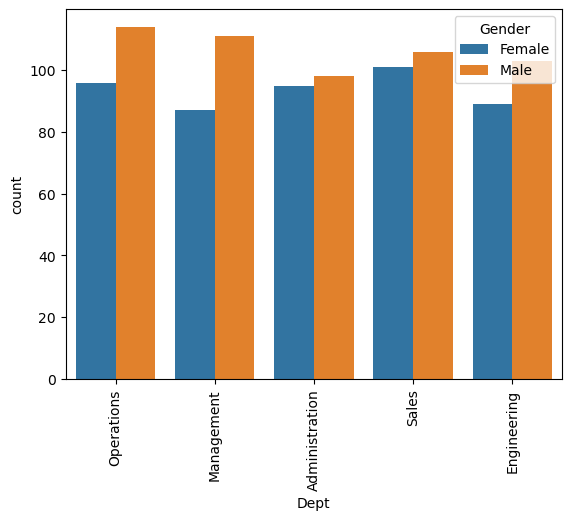

In [23]:
sns.countplot(data=data, x='Dept', hue='Gender')
plt.xticks(rotation=90)
plt.show()

## 2-We want to know whether men and women choose different departments. (and if so which department)


- **From the first look on the graph it seems that neither men or women choose different departments because differences in each Dept is slightly small**
- **which means that the null Hypo is Ture, so, it seem we will fail to reject the null Hypo**
- **Prove it statistically by Chi-Square test**

## **Chi-Square Test**

In [24]:
x2, p_value, dof, expected_freq = stats.chi2_contingency(dep_for_gender)
print(f"X2: {x2}, P value: {p_value}, degree of freedom: {dof}")

X2: 1.5505374579212654, P value: 0.8176532590847562, degree of freedom: 4


### **Since P value  is larger than sig. Level (0.05) by (0.76) so we STRONGLY !! fail to reject the Null Hypo**

### **Which mean MEN and WOMEN are likely to have the same department distribution**